<a href="https://colab.research.google.com/github/kalaiyarasi102/earthquake-project/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning & Preprocessing (for later use)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# System & Warnings
import warnings
warnings.filterwarnings('ignore')
print(" All libraries imported successfully!")

# === 2. Load Dataset ===
file_path = "/content/usgs_earthquake_data_2000_2025.csv"  # update if needed
df = pd.read_csv(file_path)
print(" Dataset Ready for Analysis\n")


print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nColumns:", ", ".join(df.columns))

print("\nSample Rows:")
print(df.sample(5))   # random 5 rows instead of head()

print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
print(df.describe(include='all').T)

print("\nMissing Values per Column:")
print(df.isnull().sum())

print("\nUnique Values per Column:")
print(df.nunique())

 All libraries imported successfully!
 Dataset Ready for Analysis

Shape: 175947 rows × 22 columns

Columns: time, latitude, longitude, depth, mag, magType, nst, gap, dmin, rms, net, id, updated, place, type, horizontalError, depthError, magError, magNst, status, locationSource, magSource

Sample Rows:
                           time  latitude  longitude   depth  mag magType  \
3463   2003-05-20T20:01:06.090Z  -17.4290   -74.3010   33.00  4.5      mb   
18217  2000-05-24T16:12:16.040Z   35.9180    22.0530   33.00  4.5      mb   
5268   2002-12-20T08:30:00.380Z  -20.9600   -67.9420  131.70  4.7      mb   
96169  2015-05-17T23:37:17.080Z   13.0018   146.1396   33.34  4.5      mb   
2708   2003-07-15T04:10:05.890Z   -0.1900   121.8990  200.00  4.8      mb   

        nst    gap   dmin   rms  ...                   updated  \
3463    9.0  105.9    NaN  0.64  ...  2014-11-07T01:18:39.149Z   
18217   NaN    NaN    NaN  1.24  ...  2014-11-07T01:10:11.474Z   
5268   15.0    NaN    NaN  0.78  ..

Shape: (175947, 22)

Missing Values:
 horizontalError    97140
magError           91515
dmin               89780
nst                67055
depthError         56055
magNst             28465
gap                17101
rms                 4678
magType                0
mag                    0
dtype: int64

Numerical Summary:
                     count       mean          std       min       25%  \
latitude         175947.0   0.722026    29.272775  -84.1330 -19.99715   
longitude        175947.0  41.966312   121.102906 -179.9997 -70.88075   
depth            175947.0  64.540709   112.598633   -2.2610  10.00000   
mag              175947.0   4.829111     0.386138    3.3800   4.60000   
nst              108892.0  81.575074    91.413821    0.0000  26.00000   
gap              158846.0  93.745689    45.859048    6.5000  59.00000   
dmin              86167.0   4.514026     5.772999    0.0000   1.35000   
rms              171269.0   0.881309     0.298023   -1.0000   0.71000   
horizontalError   788

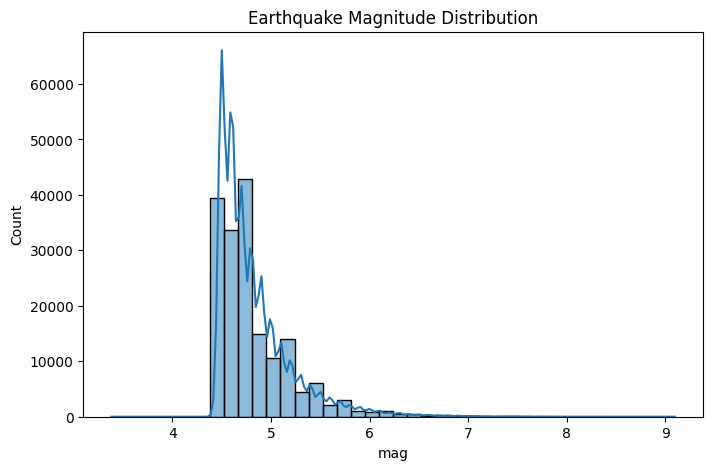

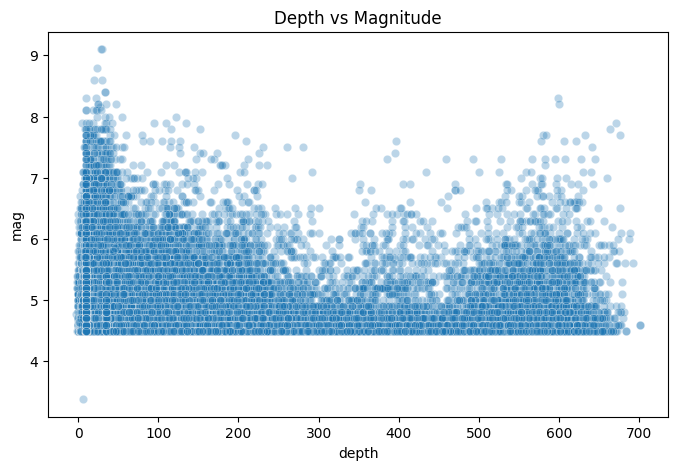

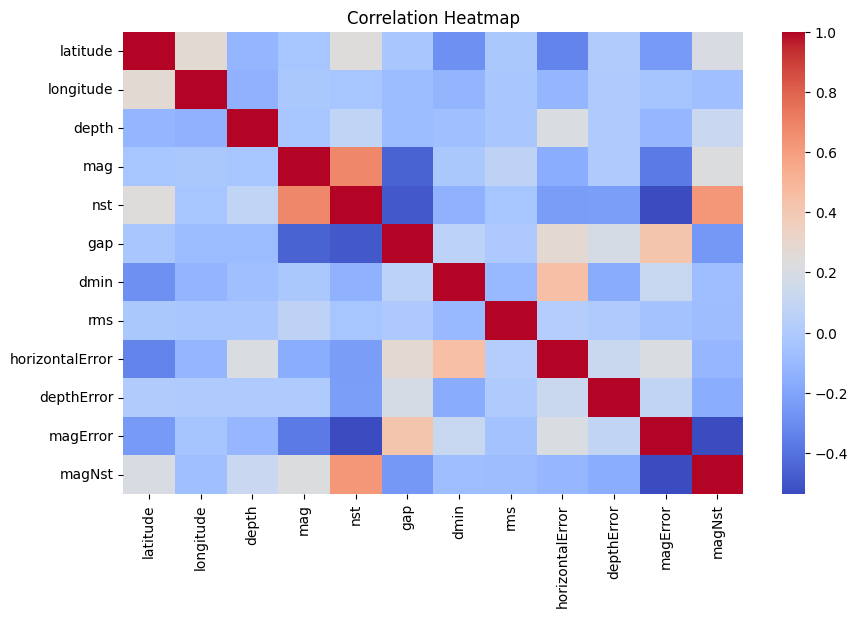


Top 10 Selected Features for Predicting Magnitude:
['depth', 'magType', 'nst', 'gap', 'rms', 'horizontalError', 'magError', 'magNst', 'magSource', 'year']


In [3]:
# === Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression

# === Load Dataset ===
file_path = "/content/usgs_earthquake_data_2000_2025.csv"
df = pd.read_csv(file_path)

# === 1. EDA ===
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum().sort_values(ascending=False).head(10))
print("\nNumerical Summary:\n", df.describe().T)
print("\nCategorical Summary:\n", df.describe(include="object").T)

# Distribution of Magnitude
plt.figure(figsize=(8,5))
sns.histplot(df['mag'], bins=40, kde=True)
plt.title("Earthquake Magnitude Distribution")
plt.show()

# Depth vs Magnitude
plt.figure(figsize=(8,5))
sns.scatterplot(x="depth", y="mag", data=df, alpha=0.3)
plt.title("Depth vs Magnitude")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# === 2. DATA TRANSFORMATION ===
# Handle missing values
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Convert time column
df["time"] = pd.to_datetime(df["time"], errors="coerce")
df["year"] = df["time"].dt.year
df["month"] = df["time"].dt.month
df["day"] = df["time"].dt.day

# Encode categorical features
le = LabelEncoder()
for col in ["magType", "net", "type", "status", "locationSource", "magSource"]:
    df[col] = le.fit_transform(df[col].astype(str))

# === 3. FEATURE SELECTION ===
X = df.drop(columns=["mag", "id", "place", "updated", "time"])
y = df["mag"]

selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("\nTop 10 Selected Features for Predicting Magnitude:")
print(selected_features.tolist())


In [12]:
 # Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (140757, 10)
Shape of X_test: (35190, 10)
Shape of y_train: (140757,)
Shape of y_test: (35190,)


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Reload dataset
file_path = "/content/usgs_earthquake_data_2000_2025.csv"
df = pd.read_csv(file_path)

# Select numerical features
features = ["latitude", "longitude", "depth", "nst", "gap", "dmin",
            "rms", "horizontalError", "depthError", "magError", "magNst"]
X = df[features].fillna(df[features].median())

# Define target categories
def categorize_mag(mag):
    if mag < 4.0:
        return "Low"
    elif mag < 6.0:
        return "Moderate"
    elif mag < 7.0:
        return "Strong"
    else:
        return "Severe"

y = df["mag"].apply(categorize_mag)

# Check class distribution
print("Class distribution:\n", y.value_counts())

# Split dataset (not stratified, avoids error)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Class distribution:
 mag
Moderate    172165
Strong        3406
Severe         375
Low              1
Name: count, dtype: int64
✅ Accuracy: 0.9828360329639102

Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00         1
    Moderate       0.99      1.00      0.99     34457
      Severe       0.33      0.03      0.05        73
      Strong       0.61      0.34      0.44       659

    accuracy                           0.98     35190
   macro avg       0.48      0.34      0.37     35190
weighted avg       0.98      0.98      0.98     35190

